### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/hapdf.csv')


### 2. Data Cleaning

In [5]:
df.head()

,Unnamed: 0,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,Afghanistan,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,2015
1,1,Albania,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,2015
2,2,Algeria,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2015
3,3,Angola,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,2015
4,4,Argentina,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2015


In [6]:
df.shape

(781, 11)

In [7]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                       0
Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         5
Family                           5
Health (Life Expectancy)         5
Freedom                          5
Trust (Government Corruption)    6
Generosity                       5
Year                             0
dtype: int64

In [8]:
#fill empty spaces w median
df['Economy (GDP per Capita)'].fillna(df['Economy (GDP per Capita)'].median(), inplace=True)
df['Family'].fillna(df['Family'].median(), inplace=True)
df['Health (Life Expectancy)'].fillna(df['Health (Life Expectancy)'].median(), inplace=True)
df['Freedom'].fillna(df['Freedom'].median(), inplace=True)
df['Trust (Government Corruption)'].fillna(df['Trust (Government Corruption)'].median(), inplace=True)
df['Generosity'].fillna(df['Generosity'].median(), inplace=True)



<ipython-input-9-925107d2c3c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Trust (Government Corruption)'],bins = 25, kde = True)


<Axes: xlabel='Trust (Government Corruption)', ylabel='Density'>

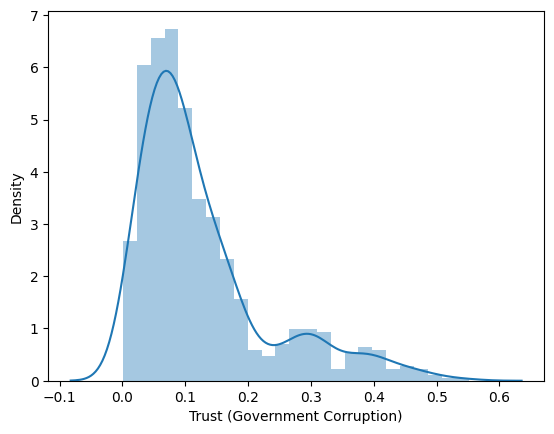

In [9]:
# Check for extreme values
sns.distplot(df['Trust (Government Corruption)'],bins = 25, kde = True)

In [10]:
# Check Mean
df['Trust (Government Corruption)'].mean()

0.12614239974007685

In [13]:
# Check median
df['Trust (Government Corruption)'].median()

0.092

In [14]:
# Check max
df['Trust (Government Corruption)'].max()

0.55191

In [15]:
# Check min
df['Trust (Government Corruption)'].min()

0.001

In [16]:
df['Trust (Government Corruption)'].max()-df['Trust (Government Corruption)'].min()

0.55091

In [17]:
df.describe()

,Unnamed: 0,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,390.373880,78.773367,5.377232,0.920836,1.085984,0.616499,0.414024,0.126142,0.219914,2016.992318
std,226.005448,45.162398,1.127071,0.398725,0.318003,0.243557,0.149308,0.105281,0.121136,1.417814
min,0.000000,1.000000,2.693000,0.015300,0.104190,0.005565,0.005890,0.001000,0.001990,2015.000000
25%,195.000000,40.000000,4.509000,0.620000,0.872118,0.449000,0.312000,0.055268,0.134000,2016.000000
50%,390.000000,79.000000,5.321000,0.984000,1.125375,0.649348,0.432726,0.092000,0.202450,2017.000000
75%,586.000000,118.000000,6.182000,1.233748,1.328000,0.808000,0.531000,0.156030,0.279060,2018.000000
max,781.000000,158.000000,7.769000,1.870766,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


### Data prep for regression analysis

#### Hypothesis 1: If a country has a high happiness score it will have a high trust score.

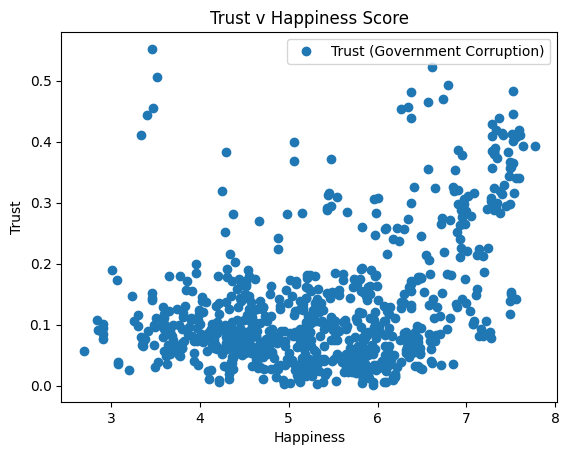

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Happiness Score', y='Trust (Government Corruption)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Trust v Happiness Score')  
plt.xlabel('Happiness')  
plt.ylabel('Trust')  
plt.show()

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Happiness Score'].values.reshape(-1,1)
y = df['Trust (Government Corruption)'].values.reshape(-1,1)

In [ ]:
X

array([[220],
       [220],
       [220],
       ...,
       [220],
       [220],
       [220]], dtype=int64)

In [ ]:
y

array([[1097.],
       [ 685.],
       [ 690.],
       ...,
       [ 605.],
       [ 650.],
       [ 640.]])

In [25]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)


### 4. Regression Analysis

In [26]:
# Create regression object
regression = LinearRegression()

In [27]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

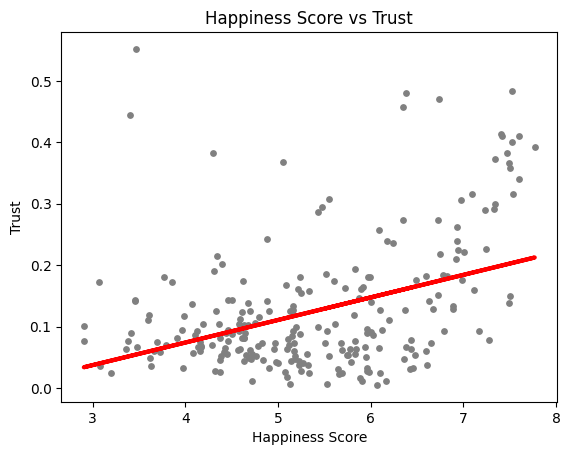

In [29]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Trust')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Trust')
plot_test.show()

#### The line doesnt fit well, consistently across so not really a linear relationship but still a positive relationship.

In [30]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03673131]]
Mean squared error:  0.009746763322846788
R2 score:  0.16687189818549353


In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.092610,0.129996
1,0.133000,0.179987
2,0.273432,0.160079
3,0.154450,0.120005
4,0.308440,0.130841
5,0.048761,0.099399
6,0.052000,0.088306
7,0.103980,0.095065
8,0.092000,0.116699
9,0.047620,0.117508


#### The predicted model basically smooths out what we noticed -- that it kicks up in correlation at the very end of the spectrum.  An R2 score of 0.16 indicates a very poor fit and the large MSE also confirms this.  The slope of 0.03 shows weak positive corr.

#### Compare how the regression fits the training set

In [33]:
# Predict on the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03673131]]
Mean squared error:  0.009107493754199439
R2 score:  0.1559786502420507


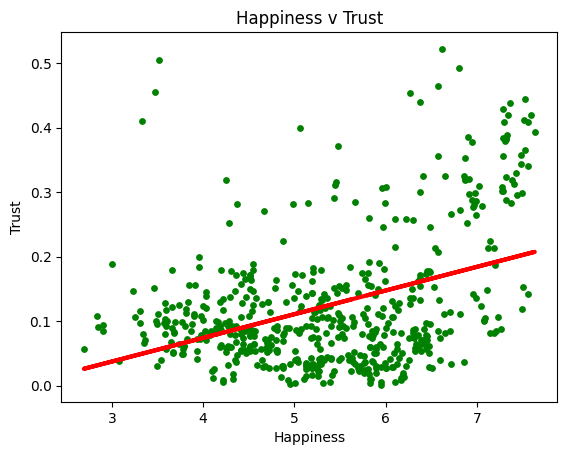

In [37]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Happiness v Trust')
plot_test.xlabel('Happiness')
plot_test.ylabel('Trust')
plot_test.show()

Little to no difference. Not a good model.

### Regression on df of happiness score greater than 6.

In [43]:
df2 = df[df['Happiness Score']>=6]
df2

,Unnamed: 0,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
4,4,Argentina,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2015
6,6,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015
7,7,Austria,13,7.200,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2015
12,12,Belgium,19,6.937,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,2015
18,18,Brazil,16,6.983,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,2015
...,...,...,...,...,...,...,...,...,...,...,...
672,673,Romania,48,6.070,1.16200,1.23200,0.82500,0.46200,0.00500,0.08300,2019
673,674,Cyprus,49,6.046,1.26300,1.22300,1.04200,0.40600,0.04100,0.19000,2019
674,675,Ecuador,50,6.028,0.91200,1.31200,0.86800,0.49800,0.08700,0.12600,2019
675,676,Kuwait,51,6.021,1.50000,1.31900,0.80800,0.49300,0.09700,0.14200,2019


In [ ]:
df2.describe()

,Sale Price,Retail Price,Shoe Size,Profit,Profit %,Release Year,Sold Year,Days since release
count,75136.000000,75136.000000,75136.000000,75136.000000,75136.000000,75136.000000,75136.000000,75136.000000
mean,368.901605,221.369117,9.247065,147.532488,0.660732,2017.348768,2018.016849,220.720094
std,145.005088,6.260955,2.376685,142.497467,0.628627,0.525513,0.554583,243.103719
min,186.000000,220.000000,3.500000,-34.000000,-0.154545,2016.000000,2017.000000,-59.000000
25%,269.000000,220.000000,8.000000,49.000000,0.222727,2017.000000,2018.000000,14.000000
50%,326.000000,220.000000,9.500000,106.000000,0.481818,2017.000000,2018.000000,82.000000
75%,410.000000,220.000000,11.000000,190.000000,0.863636,2018.000000,2018.000000,428.000000
max,2399.000000,250.000000,17.000000,2149.000000,8.596000,2018.000000,2019.000000,872.000000


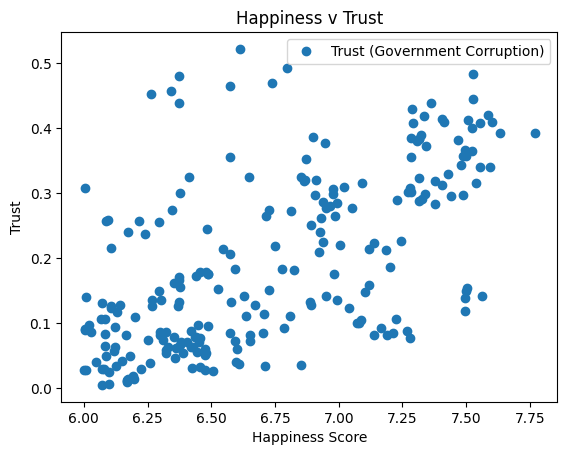

In [44]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'Happiness Score', y='Trust (Government Corruption)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness v Trust')  
plt.xlabel('Happiness Score')  
plt.ylabel('Trust')  
plt.show()

In [47]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df2['Happiness Score'].values.reshape(-1,1)
y = df2['Trust (Government Corruption)'].values.reshape(-1,1)

In [48]:
X

array([[6.574     ],
       [7.284     ],
       [7.2       ],
       [6.937     ],
       [6.983     ],
       [7.427     ],
       [6.67      ],
       [6.477     ],
       [7.226     ],
       [6.505     ],
       [7.527     ],
       [6.13      ],
       [7.406     ],
       [6.575     ],
       [6.75      ],
       [6.123     ],
       [7.561     ],
       [6.94      ],
       [7.278     ],
       [6.295     ],
       [6.946     ],
       [6.302     ],
       [7.187     ],
       [7.378     ],
       [7.286     ],
       [7.522     ],
       [6.853     ],
       [6.786     ],
       [6.611     ],
       [6.411     ],
       [6.798     ],
       [6.329     ],
       [6.269     ],
       [7.364     ],
       [7.587     ],
       [6.298     ],
       [6.455     ],
       [6.168     ],
       [6.901     ],
       [6.867     ],
       [7.119     ],
       [6.485     ],
       [6.003     ],
       [6.81      ],
       [6.355     ],
       [6.65      ],
       [7.313     ],
       [7.119

In [49]:
y

array([[0.08484   ],
       [0.35637   ],
       [0.18676   ],
       [0.2254    ],
       [0.17521   ],
       [0.32957   ],
       [0.12869   ],
       [0.0512    ],
       [0.10583   ],
       [0.02652   ],
       [0.48357   ],
       [0.11776   ],
       [0.41372   ],
       [0.20646   ],
       [0.21843   ],
       [0.09472   ],
       [0.14145   ],
       [0.28703   ],
       [0.07785   ],
       [0.25609   ],
       [0.37798   ],
       [0.13586   ],
       [0.21312   ],
       [0.31814   ],
       [0.42922   ],
       [0.36503   ],
       [0.32524   ],
       [0.0927    ],
       [0.52208   ],
       [0.32524   ],
       [0.4921    ],
       [0.06398   ],
       [0.13633   ],
       [0.43844   ],
       [0.41978   ],
       [0.08129   ],
       [0.03187   ],
       [0.0114    ],
       [0.38583   ],
       [0.32067   ],
       [0.1589    ],
       [0.24558   ],
       [0.30826   ],
       [0.11069   ],
       [0.16157   ],
       [0.07296   ],
       [0.32331   ],
       [0.213

In [50]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [51]:
### 4. Regression Analysis

# Create regression object
regression = LinearRegression()

In [52]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [53]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

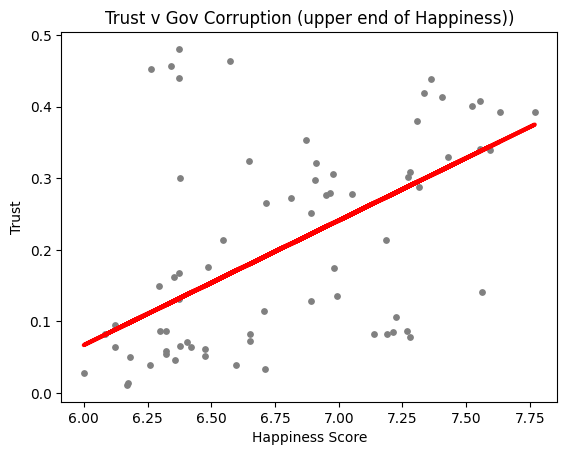

In [54]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Trust v Gov Corruption (upper end of Happiness))')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Trust')
plot_test.show()

In [55]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [56]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17401357]]
Mean squared error:  0.015941908180244668
R2 score:  0.2156856915694072


JUst as we predicted, on the higher end up the spectrum of happiness, higher trust has a stronger positive relationship. There is a threshold where it makes no difference but when trust is high it does correlate with happiness.

### Hypothesis 2:  Health will have a strong positive relationship with happiness through the range of happiness scores,
> Indented block



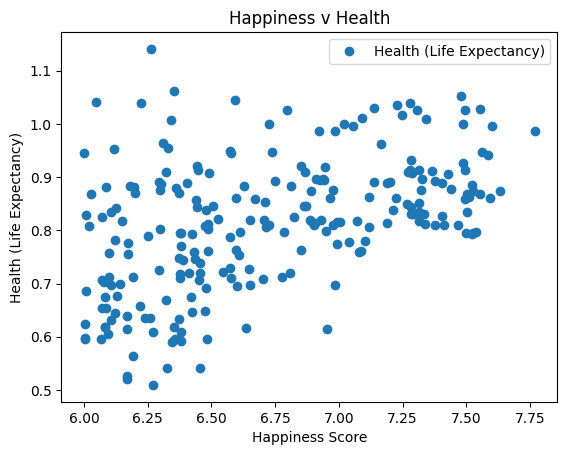

In [57]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'Happiness Score', y='Health (Life Expectancy)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness v Health')  
plt.xlabel('Happiness Score')  
plt.ylabel('Health (Life Expectancy)')  
plt.show()

In [58]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Happiness Score'].values.reshape(-1,1)
y = df['Health (Life Expectancy)'].values.reshape(-1,1)

In [59]:
X

array([[3.575     ],
       [4.959     ],
       [5.605     ],
       [4.033     ],
       [6.574     ],
       [4.35      ],
       [7.284     ],
       [7.2       ],
       [5.212     ],
       [5.96      ],
       [4.694     ],
       [5.813     ],
       [6.937     ],
       [3.34      ],
       [5.253     ],
       [5.89      ],
       [4.949     ],
       [4.332     ],
       [6.983     ],
       [4.218     ],
       [3.587     ],
       [2.905     ],
       [3.819     ],
       [4.252     ],
       [7.427     ],
       [3.678     ],
       [3.667     ],
       [6.67      ],
       [5.14      ],
       [6.477     ],
       [3.956     ],
       [3.989     ],
       [4.517     ],
       [7.226     ],
       [5.759     ],
       [5.689     ],
       [6.505     ],
       [7.527     ],
       [4.369     ],
       [4.885     ],
       [5.975     ],
       [4.194     ],
       [6.13      ],
       [5.429     ],
       [4.512     ],
       [7.406     ],
       [6.575     ],
       [3.896

In [61]:
y

array([[0.30335   ],
       [0.81325   ],
       [0.61766   ],
       [0.16683   ],
       [0.78723   ],
       [0.7299    ],
       [0.93156   ],
       [0.89042   ],
       [0.64045   ],
       [0.74716   ],
       [0.60164   ],
       [0.73608   ],
       [0.89667   ],
       [0.3191    ],
       [0.57407   ],
       [0.5392    ],
       [0.79081   ],
       [0.04776   ],
       [0.69702   ],
       [0.76649   ],
       [0.27125   ],
       [0.22396   ],
       [0.61114   ],
       [0.23402   ],
       [0.90563   ],
       [0.06699   ],
       [0.1501    ],
       [0.85857   ],
       [0.81658   ],
       [0.69077   ],
       [0.36315   ],
       [0.31051   ],
       [0.09806   ],
       [0.86027   ],
       [0.78805   ],
       [0.92356   ],
       [0.84483   ],
       [0.87464   ],
       [0.36291   ],
       [0.66825   ],
       [0.79075   ],
       [0.61712   ],
       [0.67737   ],
       [0.77361   ],
       [0.44055   ],
       [0.88911   ],
       [0.94579   ],
       [0.433

In [65]:
# Split data into a training set and a test set.  Using test_train_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =0)

#### Regression Analysis

In [66]:
regression.fit(X_train, y_train)

LinearRegression()

In [67]:
y_predicted = regression.predict(X_test)

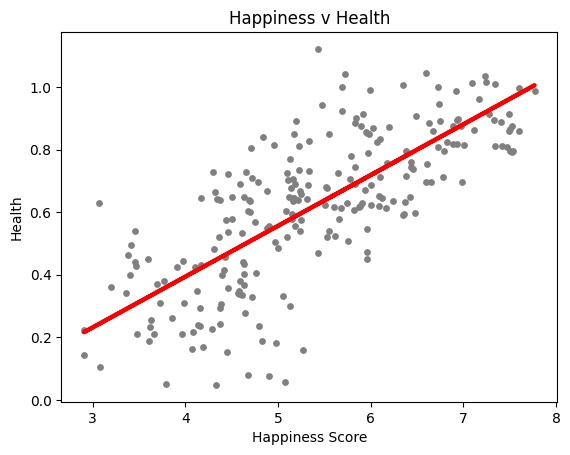

In [69]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness v Health')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Health')
plot_test.show()

In [70]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [71]:
# Check summary stats
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.16242221]]
Mean squared error:  0.026544394016737496
R2 score:  0.5462783566839885


In [72]:
# Create a dataframe comparing the actual and predicted values of y.

data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.092610,0.129996
1,0.133000,0.179987
2,0.273432,0.160079
3,0.154450,0.120005
4,0.308440,0.130841
5,0.048761,0.099399
6,0.052000,0.088306
7,0.103980,0.095065
8,0.092000,0.116699
9,0.047620,0.117508


This is a pretty good fit! R2 is high. The error seems high, where it is not a TIGHT relationship but in general this is a much better predictor than trust was.

#### Try on wealth


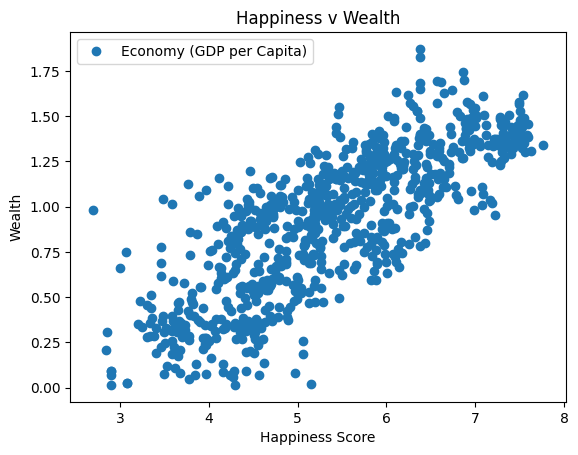

In [75]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Happiness Score', y='Economy (GDP per Capita)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness v Wealth')  
plt.xlabel('Happiness Score')  
plt.ylabel('Wealth')  
plt.show()

In [77]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Happiness Score'].values.reshape(-1,1)
y = df['Economy (GDP per Capita)'].values.reshape(-1,1)

In [78]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [79]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [80]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

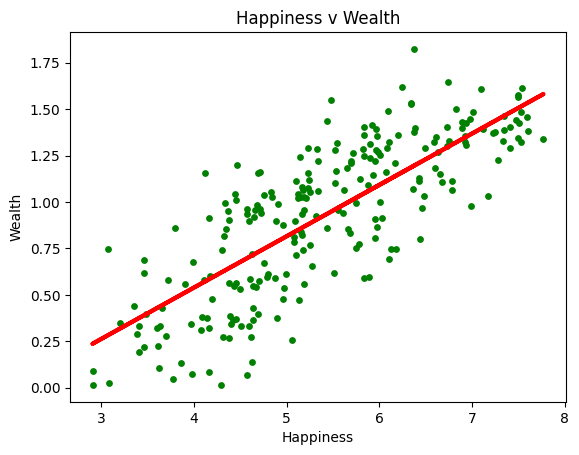

In [81]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness v Wealth')
plot_test.xlabel('Happiness')
plot_test.ylabel('Wealth')
plot_test.show()

In [83]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.27643845]]
Mean squared error:  0.06446511288421167
R2 score:  0.6258867866655968


#### This is the strongest indicator out of all three variables we tested. The slope is greater, the R2 is greater, and the rate of error is lower. This is definitely the strongest indicator, I am  a little surprised!